## Librerías

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import ceil
import seaborn as sns


## Carga de datos

### Monthly Report

Monthly performance breakdown for every property in the market. 1 row = 1 month's performance data for a specific property.

Descripción de las columnas:

| Variable | Descripción | Relevancia para el estudio de turismo |
|----------|-------------|---------------------------------------|
- `Property ID`:
- `Property Type`:
- `Listing Type`:
- `Bedrooms`:
- `Reporting Month`:
- `Occupancy Rate`:
- `Revenue (USD)`:
- `Revenue(Native)`:
- `ADR (USD)`:
- `ADR (Native)`:
- `Number of Reservations`:
- `Reservation Days`:
- `Available Days`:
- `Blocked Days`:
- `Country`:
- `State`:
- `City`:
- `Latitude`:
- `Longitude`:
- `Active`:
- `Scraped During Month`:
- `Currency Native`:
- `Airbnb Property ID`:
- `HomeAway Property Manager`:




In [38]:
path = os.path.join(os.getcwd(), 'data/processed_monthly.csv')

df_monthly = pd.read_csv(path, sep=',', decimal='.')

df_monthly.head(3)

C:\Users\Multivac Desktop\AppData\Local\Temp\ipykernel_3036\3927858529.py:3: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_monthly = pd.read_csv(path, sep=',', decimal='.')


,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,Country,State,City,Latitude,Longitude,Active,Scraped During Month,Currency Native,Airbnb Property ID,HomeAway Property Manager
0,ab-295403,Entire apartment,Entire home/apt,2,2016-06-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
1,ab-295403,Entire apartment,Entire home/apt,2,2016-07-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
2,ab-295403,Entire apartment,Entire home/apt,2,2016-08-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,False,EUR,295403.0,NaN


In [39]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950448 entries, 0 to 950447
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Property ID                950448 non-null  object 
 1   Property Type              950307 non-null  object 
 2   Listing Type               950400 non-null  object 
 3   Bedrooms                   950448 non-null  int64  
 4   Reporting Month            950448 non-null  object 
 5   Occupancy Rate             950448 non-null  float64
 6   Revenue (USD)              950448 non-null  float64
 7   Revenue (Native)           713678 non-null  float64
 8   ADR (USD)                  306907 non-null  float64
 9   ADR (Native)               241112 non-null  float64
 10  Number of Reservations     950448 non-null  int64  
 11  Reservation Days           950448 non-null  int64  
 12  Available Days             950448 non-null  int64  
 13  Blocked Days               95

### Extended Report

An index of properties in the market. It holds some performance data, but this file's main purpose is to report on listing characteristics.

| Variable | Descripción | Relevancia para el estudio de turismo |
|----------|-------------|---------------------------------------|
| `distancia_ayuntamiento_km` | Distancia (en km) desde cada alojamiento al ayuntamiento del municipio | Proximidad al centro administrativo / centro urbano (acceso a servicios, vida local) |
| `distancia_playa_km` | Distancia (en km) desde cada alojamiento a la playa más cercana | Factor clave para turismo de sol y playa (atractivo principal en Costa Blanca) |
| `distancia_poi_mas_cercano_km` | Distancia (en m) al punto de interés turístico más cercano | Medida de accesibilidad a atracciones culturales / turísticas |
| `distancia_supermercado_mas_cercano_km` | Distancia (en m) al supermercado más cercano | Comodidad para estancias largas / turismo residencial |
| `distancia_parada_bus_mas_cercana_km` | Distancia (en m) a la parada de autobús más cercana | Accesibilidad mediante transporte público, movilidad sin coche |
| `num_pois_2km` | Número de puntos de interés turístico en un radio de 2 km | Densidad de atracciones cercanas (entorno atractivo) |
| `num_supermercados_2km` | Número de supermercados en un radio de 2 km | Acceso a compras de proximidad |
| `num_paradas_bus_2km` | Número de paradas de autobús en un radio de 2 km | Acceso a transporte público local |
| `num_restaurantes_2km` | Número de restaurantes en un radio de 2 km | Oferta gastronómica accesible |

In [40]:
path = os.path.join(os.getcwd(), 'data/processed_extended.csv')

df_extended = pd.read_csv(path, sep=',', decimal='.')

df_extended.head(3)

C:\Users\Multivac Desktop\AppData\Local\Temp\ipykernel_3036\1752036324.py:3: DtypeWarning: Columns (48,56,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_extended = pd.read_csv(path, sep=',', decimal='.')


,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Currency Native,...,Airbnb Property ID,distancia_ayuntamiento_km,distancia_playa_km,Dist_POI_m,N_POI_2km,Dist_Supermercado_m,N_Supermercado_2km,Dist_ParadaBus_m,N_ParadaBus_2km,N_Restaurante_2km
0,ab-295403,A top floor apartment by the sea,Entire apartment,Entire home/apt,2011-12-24,2017-12-19,Spain,NaN,Guardamar del Segura,EUR,...,295403.0,0.633652,1.419984,165.890603,20,335.758591,4,150.928478,31,60
1,ab-484366,Beach house 300m from the sea Spain,Home,Entire home/apt,2012-05-16,2023-11-15,Spain,Alicante,Guardamar del Segura,EUR,...,484366.0,2.947033,1.779121,232.151642,2,1112.385796,1,280.114597,12,11
2,ab-608855,Ven a tomar el sol al Mediterráneo,Apartment,Entire home/apt,2012-07-21,2021-02-09,Spain,Alicante,Guardamar del Segura,EUR,...,608855.0,0.917645,0.492796,181.470751,18,467.356195,4,205.049253,36,62


In [41]:
df_extended.columns

Index(['Property ID', 'Listing Title', 'Property Type', 'Listing Type',
       'Created Date', 'Last Scraped Date', 'Country', 'State', 'City',
       'Currency Native', 'Average Daily Rate (USD)',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (USD)',
       'Annual Revenue LTM (Native)', 'Occupancy Rate LTM',
       'Number of Bookings LTM', 'Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Calendar Last Updated', 'Response Rate',
       'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Security Deposit (Native)',
       'Cleaning Fee (USD)', 'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee (Native)', 'Published Nightly Rate (USD)',
       'Published Monthly Rate (USD)', 'Published Weekly Rate (USD)',
       'Check-in Time', 'Checkout Time', 'Minimum Stay',
       'Count Reservation Days LTM', 'Count Available Days LTM',
       'Count Bl

## Funciones auxiliares

In [73]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)


def estadisticos_cont(df: pd.DataFrame, columns: list, by_municipio: bool = True):
    """
    Calcula estadísticas descriptivas de columnas numéricas, opcionalmente segmentadas por municipio.

    Parameters:
    - df: DataFrame con los datos.
    - columns: Lista de nombres de columnas numéricas a analizar.
    - by_municipio: Si True, segmenta por municipio (columna 'City').

    Returns:
    - DataFrame con estadísticas para cada variable (y municipio si aplica).
    """

    if by_municipio:
        # Agrupamos por municipio y calculamos describe para las columnas
        grouped = df.groupby('City')[columns]
        describe = grouped.describe()

        # Cambiamos el nombre a las columnas
        describe.columns = [f"{col}_{stat}" for col, stat in describe.columns]

        return describe.round(3)

    else:
        subset = df[columns]
        describe = subset.describe().T
        describe['median'] = subset.median()
        describe = describe[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
        return describe.round(3)



def show_nulls(df):
    nulos = df.isnull().sum()

    # Para verlo como porcentaje
    porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

    # Para ver ambos en un DataFrame ordenado por porcentaje de nulos
    resumen_nulos = pd.DataFrame({
        'Valores Nulos': nulos,
        'Porcentaje Nulos': porcentaje_nulos
    }).sort_values('Porcentaje Nulos', ascending=False)

    plt.figure(figsize=(15, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Mapa de Calor de Valores Nulos')
    plt.show()
    print(resumen_nulos.to_string())

## Preprocesado

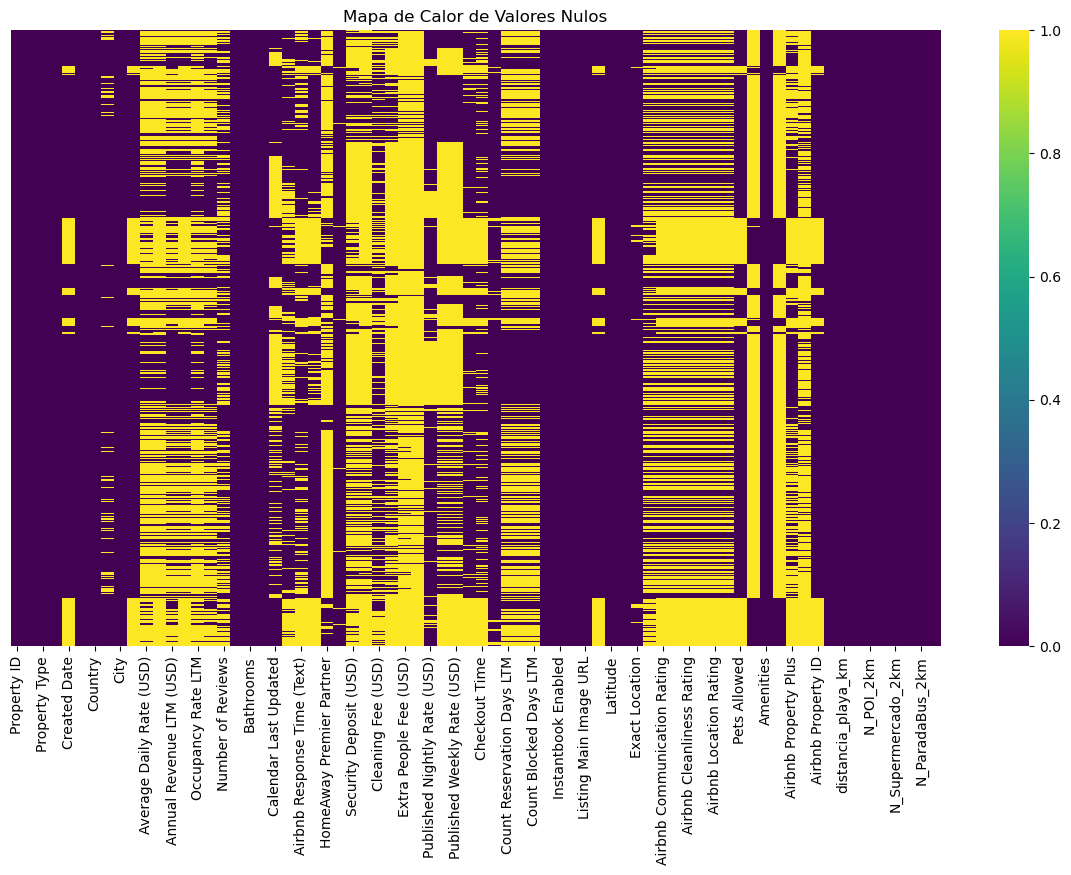

                              Valores Nulos  Porcentaje Nulos
Extra People Fee (Native)             29999         93.849523
Extra People Fee (USD)                29585         92.554356
License                               25907         81.048021
Integrated Property Manager           25902         81.032379
HomeAway Location Type                25844         80.850931
Security Deposit (Native)             25253         79.002033
Cleaning Fee (Native)                 23880         74.706710
HomeAway Premier Partner              23518         73.574222
Security Deposit (USD)                23373         73.120601
Average Daily Rate (Native)           21942         68.643829
Occupancy Rate LTM                    20699         64.755201
Average Daily Rate (USD)              20699         64.755201
Published Monthly Rate (USD)          20428         63.907399
Published Weekly Rate (USD)           20427         63.904270
Annual Revenue LTM (Native)           17823         55.757860
Airbnb L

In [43]:
# Analisis de nulos
show_nulls(df_extended)

Las columnas que tienen demasiados nulos (>30%) las eliminamos

In [44]:
df_extended_processed = df_extended.dropna(axis=1, thresh=(1-30/100)*len(df_extended))

df_extended_processed.head(3)

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Currency Native,...,Airbnb Property ID,distancia_ayuntamiento_km,distancia_playa_km,Dist_POI_m,N_POI_2km,Dist_Supermercado_m,N_Supermercado_2km,Dist_ParadaBus_m,N_ParadaBus_2km,N_Restaurante_2km
0,ab-295403,A top floor apartment by the sea,Entire apartment,Entire home/apt,2011-12-24,2017-12-19,Spain,NaN,Guardamar del Segura,EUR,...,295403.0,0.633652,1.419984,165.890603,20,335.758591,4,150.928478,31,60
1,ab-484366,Beach house 300m from the sea Spain,Home,Entire home/apt,2012-05-16,2023-11-15,Spain,Alicante,Guardamar del Segura,EUR,...,484366.0,2.947033,1.779121,232.151642,2,1112.385796,1,280.114597,12,11
2,ab-608855,Ven a tomar el sol al Mediterráneo,Apartment,Entire home/apt,2012-07-21,2021-02-09,Spain,Alicante,Guardamar del Segura,EUR,...,608855.0,0.917645,0.492796,181.470751,18,467.356195,4,205.049253,36,62


La variable state la podemos imputar a Alicante, ya que todas las muestras son de municipios de esta provincia, mientras que el Country, también es de Spain

In [45]:
df_extended_processed['Country'] = df_extended_processed['Country'].fillna('Spain')
df_extended_processed['State'] = df_extended_processed['State'].fillna('Alicante')

C:\Users\Multivac Desktop\AppData\Local\Temp\ipykernel_3036\998259307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_processed['Country'] = df_extended_processed['Country'].fillna('Spain')
C:\Users\Multivac Desktop\AppData\Local\Temp\ipykernel_3036\998259307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_processed['State'] = df_extended_processed['State'].fillna('Alicante')


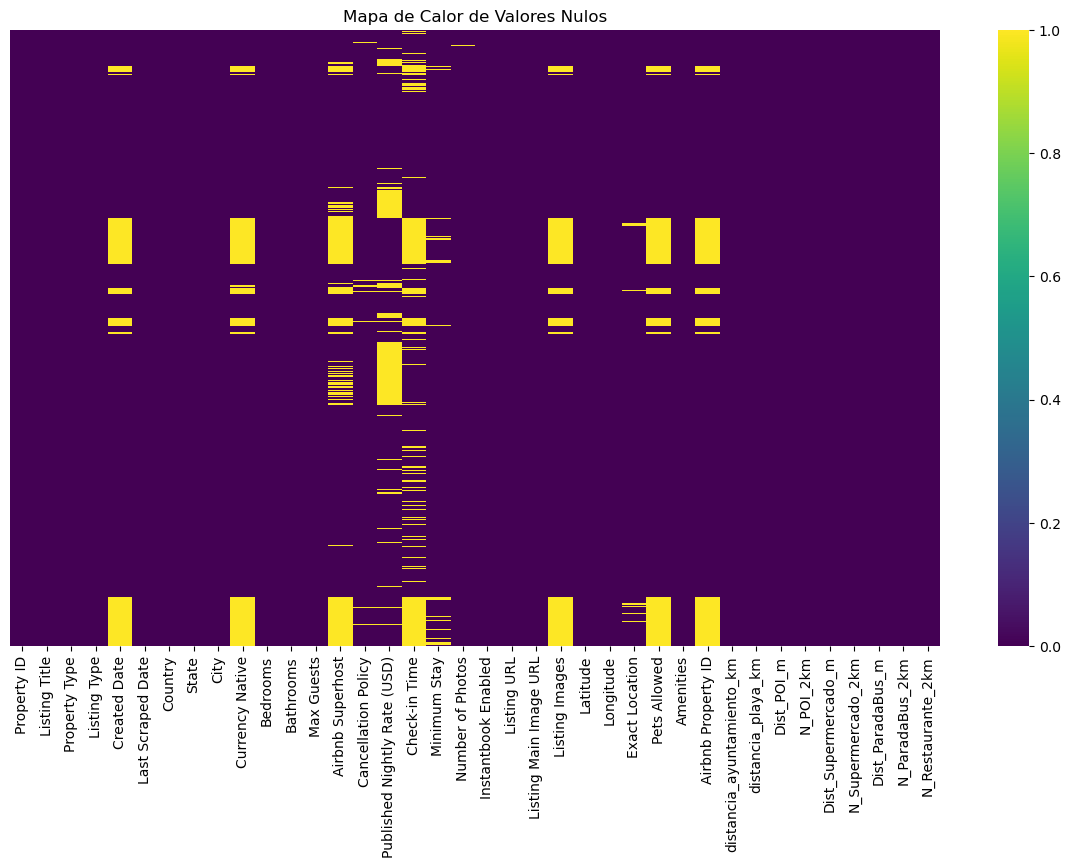

                              Valores Nulos  Porcentaje Nulos
Airbnb Superhost                       8272         25.878304
Check-in Time                          8257         25.831378
Published Nightly Rate (USD)           6621         20.713280
Currency Native                        6131         19.180354
Created Date                           6121         19.149069
Pets Allowed                           6121         19.149069
Listing Images                         6121         19.149069
Airbnb Property ID                     6121         19.149069
Minimum Stay                            913          2.856249
Exact Location                          533          1.667449
Cancellation Policy                     310          0.969811
Number of Photos                         38          0.118880
Property Type                            10          0.031284
Listing Title                             6          0.018771
Listing Main Image URL                    6          0.018771
Listing 

In [46]:
show_nulls(df_extended_processed)

In [47]:
# Cambiar tipo de booleanos
df_extended_processed = df_extended_processed.astype({'Airbnb Superhost': 'bool', 'Exact Location': 'bool', 'Pets Allowed': 'bool'})

In [48]:
df_extended_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31965 entries, 0 to 31964
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Property ID                   31965 non-null  object 
 1   Listing Title                 31959 non-null  object 
 2   Property Type                 31955 non-null  object 
 3   Listing Type                  31961 non-null  object 
 4   Created Date                  25844 non-null  object 
 5   Last Scraped Date             31965 non-null  object 
 6   Country                       31965 non-null  object 
 7   State                         31965 non-null  object 
 8   City                          31965 non-null  object 
 9   Currency Native               25834 non-null  object 
 10  Bedrooms                      31965 non-null  int64  
 11  Bathrooms                     31965 non-null  float64
 12  Max Guests                    31965 non-null  int64  
 13  A

## Análisis Exploratorio (EDA)

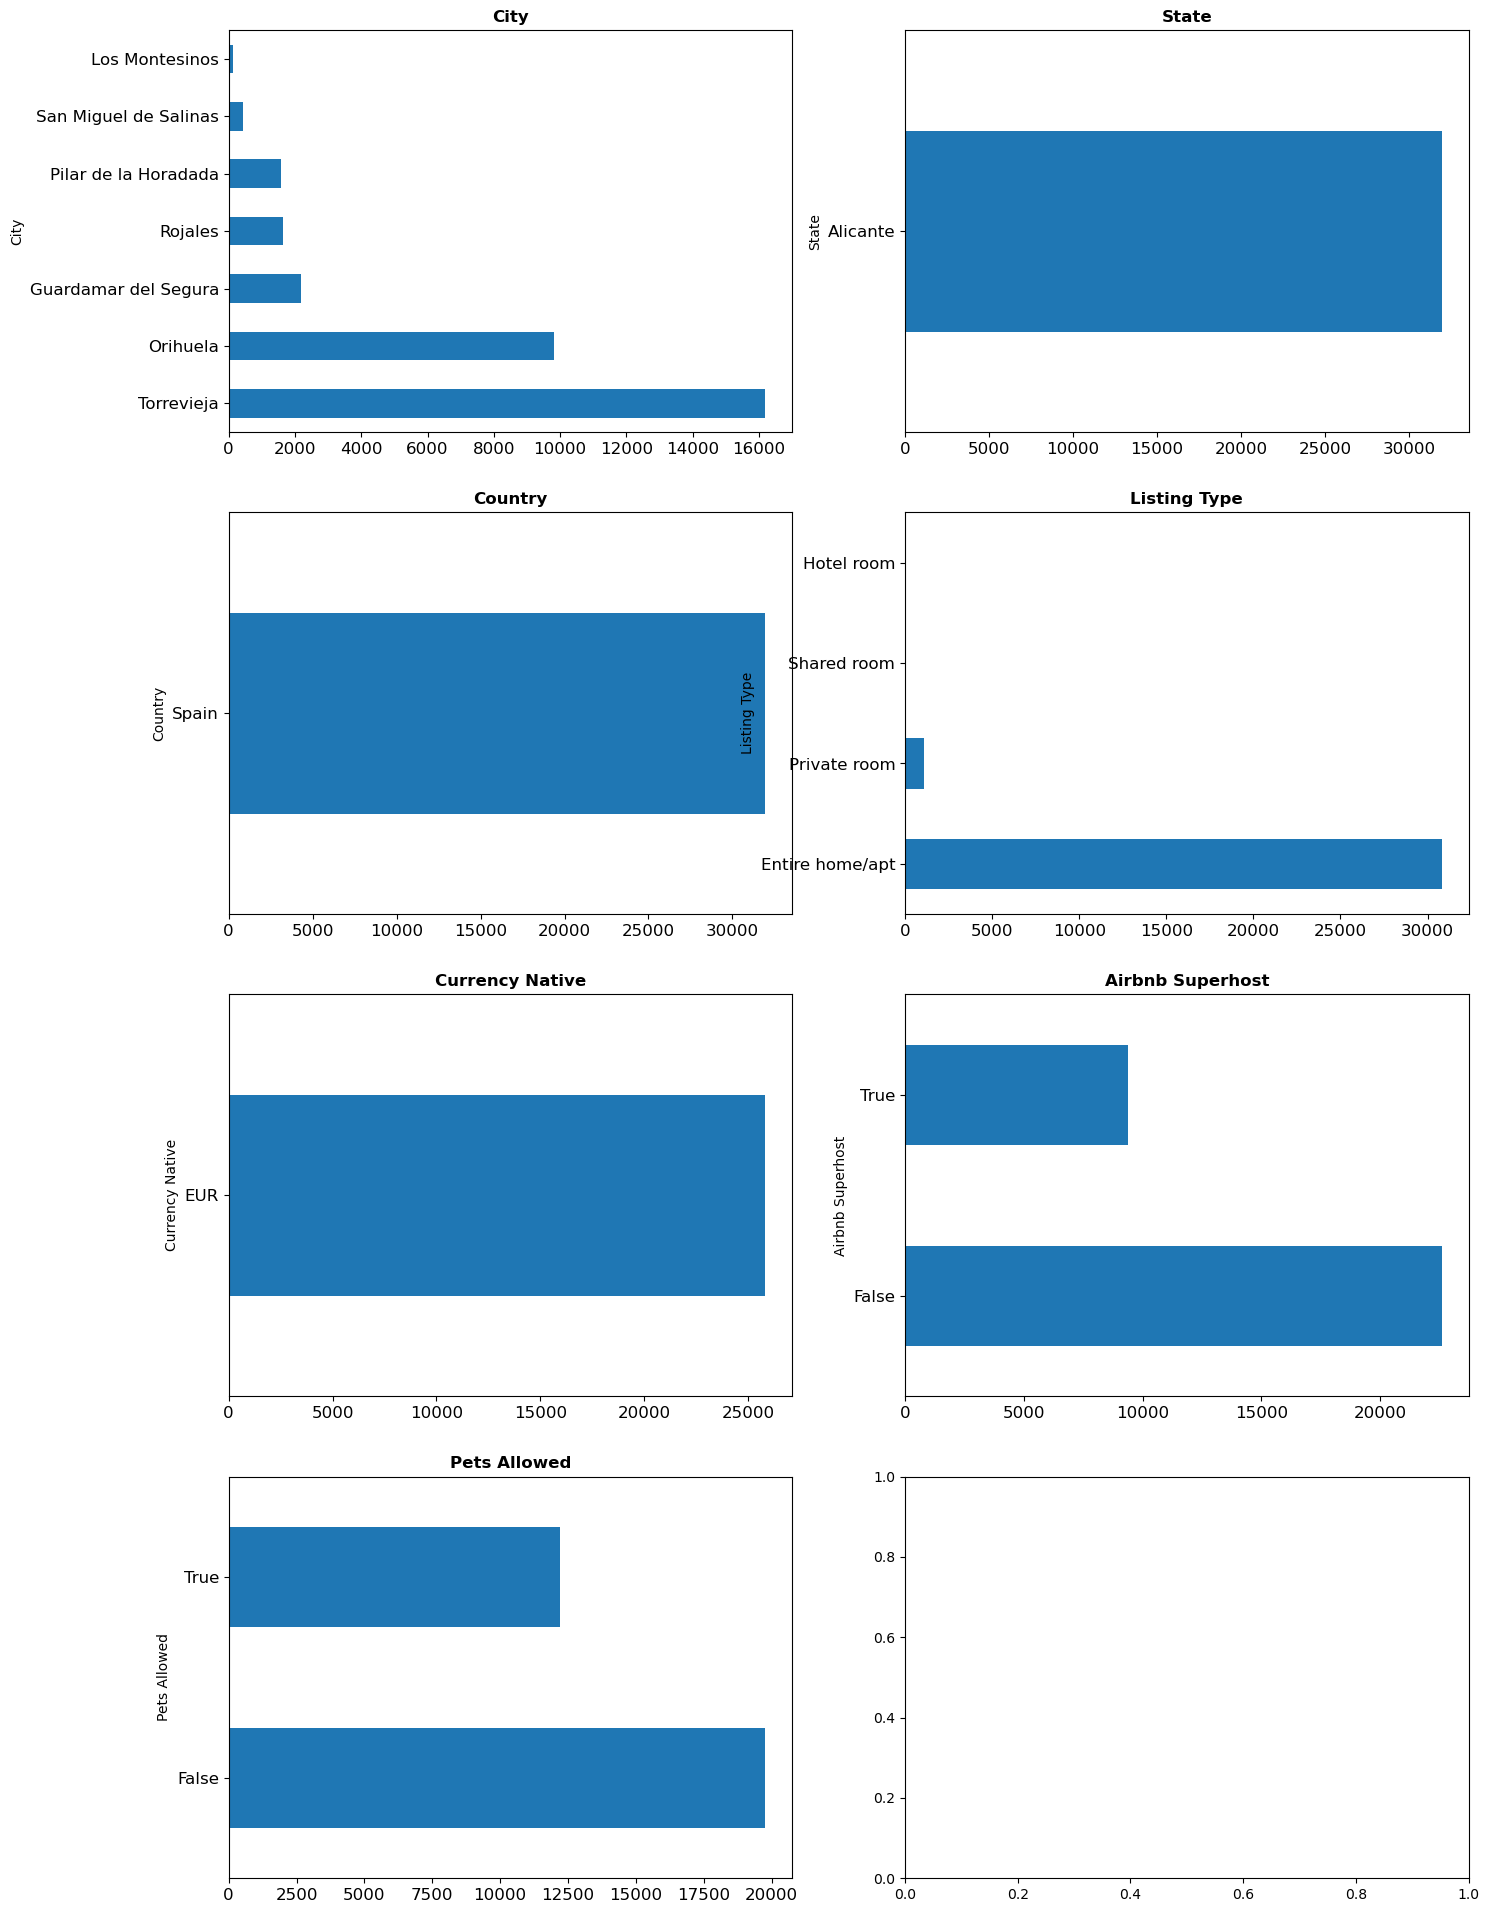

In [49]:
graficos_eda_categoricos(df_extended_processed[['City', 'State', 'Country', 'Listing Type', 'Currency Native', 'Airbnb Superhost', 'Pets Allowed']])

Eliminamos las columnas de: Currency Native, State, Country. Al tener únicamente un valor

In [50]:
df_extended_processed.drop(columns=['Currency Native', 'Country', 'State'], inplace=True)

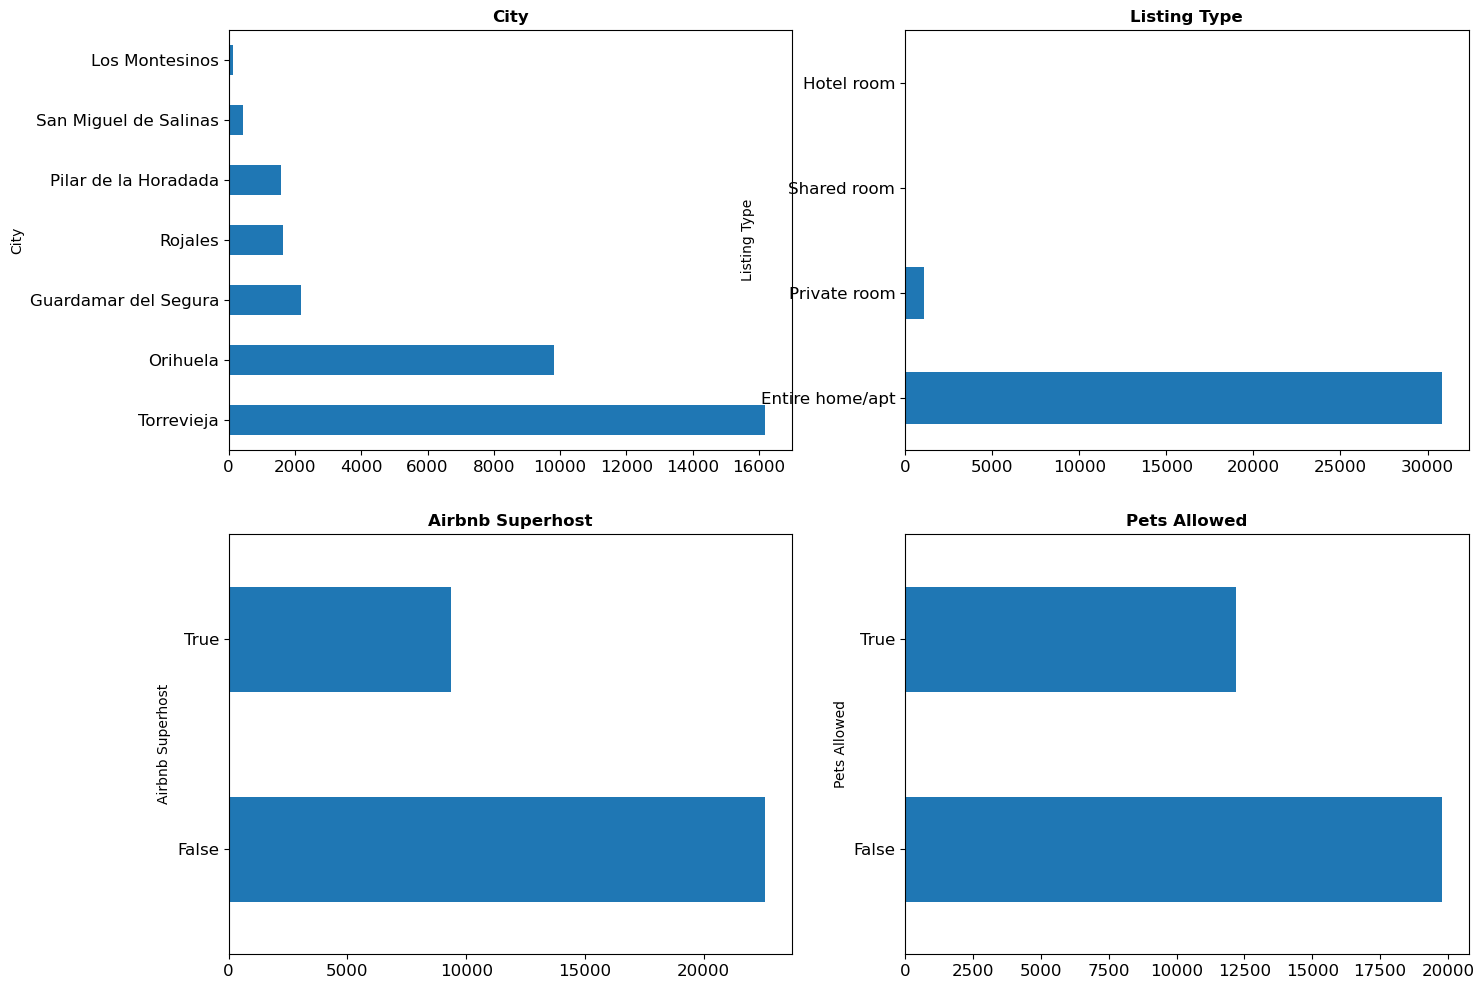

In [52]:
graficos_eda_categoricos(df_extended_processed[['City', 'Listing Type', 'Airbnb Superhost', 'Pets Allowed']])

Conclusiones:
- El municipio del que tenemos más datos de alojamientos, es sin duda el de Torrevieja, con más de 16 mil alojamientos publicados; seguido por Orihuela con casi 10 mil.
- Destaca el hecho de que pese a tener datos de censo similares a fecha de 2025, ambos municipios, con 85 mil habitantes en Orihuela ([Fuente](https://www.orihuela.es/el-municipio-de-orihuela-alcanza-los-85-674-habitantes-empadronados/#:~:text=enero%20de%202025-,El%20municipio%20de%20Orihuela%20alcanza%20los%2085.674%20habitantes%20empadronados,9%25%20con%20respecto%20a%202023.)) y 100 mil habitantes en Torrevieja ([Fuente](https://torrevieja.es/es/noticias/2024-02-01-torrevieja-supera-100000-habitantes-empadronados)). Sin embargo, Torrevieja tiene mucha más atracción para los pisos de alquiler de Airbnb, principalmente por su cercanía al mar y su mayor movimiento turístico.
- La mayor parte de publicaciones son para apartamentos completos, representando únicamente las publicaciones de habitaciones privadas menos de 2 mil publicaciones frente a las más de 30 mil registros.
- La tasa de superanfitriones es bastante aceptable, llegando casi a los 10 mil de 32 mil registros, indicando una buena relación entre huéspedes y propietarios
- Aproximadamente el 40% de las viviendas aceptan mascotas.

### Numéricos

In [74]:
# Micro: por municipio
estadisticos_cont(df_extended_processed,
                  columns=['Bathrooms', 'Bedrooms', 'Max Guests', 'Minimum Stay', 'Number of Photos', 'distancia_ayuntamiento_km', 'distancia_playa_km', 'Dist_POI_m', 'N_POI_2km', 'Dist_Supermercado_m', 'N_Supermercado_2km', 'Dist_ParadaBus_m', 'N_ParadaBus_2km', 'N_Restaurante_2km'],
                  by_municipio=True)

,Bathrooms_count,Bathrooms_mean,Bathrooms_std,Bathrooms_min,Bathrooms_25%,Bathrooms_50%,Bathrooms_75%,Bathrooms_max,Bedrooms_count,Bedrooms_mean,...,N_ParadaBus_2km_75%,N_ParadaBus_2km_max,N_Restaurante_2km_count,N_Restaurante_2km_mean,N_Restaurante_2km_std,N_Restaurante_2km_min,N_Restaurante_2km_25%,N_Restaurante_2km_50%,N_Restaurante_2km_75%,N_Restaurante_2km_max
City,,,,,,,,,,,,,,,,,,,,,
Guardamar del Segura,2196.0,1.566,0.714,0.0,1.0,1.5,2.0,14.0,2196.0,2.245,...,33.0,36.0,2196.0,39.289,26.775,0.0,4.0,59.0,62.0,63.0
Los Montesinos,131.0,1.920,2.002,1.0,1.0,2.0,2.0,23.0,131.0,2.718,...,1.0,1.0,131.0,13.695,3.959,0.0,15.0,15.0,15.0,15.0
Orihuela,9807.0,1.721,0.747,0.0,1.0,2.0,2.0,8.5,9807.0,2.342,...,16.0,23.0,9807.0,33.714,18.080,0.0,20.0,36.0,51.0,69.0
Pilar de la Horadada,1584.0,1.799,0.663,0.0,1.0,2.0,2.0,6.0,1584.0,2.420,...,13.0,16.0,1584.0,15.055,6.565,0.0,9.0,17.0,21.0,24.0
Rojales,1630.0,1.937,0.816,0.0,1.0,2.0,2.0,6.0,1630.0,2.612,...,1.0,1.0,1630.0,19.385,6.517,1.0,17.0,19.0,20.0,33.0
San Miguel de Salinas,421.0,1.980,0.884,0.0,1.0,2.0,2.0,6.0,421.0,2.518,...,0.0,3.0,421.0,3.705,3.272,0.0,1.0,3.0,6.0,11.0
Torrevieja,16196.0,1.326,0.560,0.0,1.0,1.0,2.0,7.5,16196.0,1.892,...,63.0,87.0,16196.0,85.998,56.839,0.0,33.0,96.5,142.0,165.0


Conclusiones micro
- Con la media de habitaciones, vemos que Torrevieja tiene un valor de 1.89 -> viviendas más pequeñas, probablemente enfocadas a parejas o turismo económico.
- Mientras que otros municipios como Los Montesinos o Rojales, tienen valores más cercanos al 2.7 y 2.6 -> propiedades más grandes, orientación a familias.
- Torrevieja tiene una media de 49 paradas de bus en una distancia de 2km, muy por encima del resto -> esto es indicativo de alta conectividad y urbanización, mejor posicionado para el turismo sin coche.
- En cuanto a turismo gastronómico, Torrevieja vuelve a tener una media de 86 restaurantes alrededor, seguido de Guardamar con 39 y Orihuela con 33 -> zonas con más vida comercial y enfocado a la gastronomía
- También para los supermercados, en el caso de optar por localidades como San Miguel de Salinas o Pilar de la Horadada, debemos de tener en consideración que la distancia media al supermercado más cercano son 3km

---

---

In [10]:
estadisticos_cont(df[['Bedrooms', 'Occupancy Rate', 'Reservation Days', 'Available Days', 'Blocked Days', 'Number of Reservations', 'Revenue (Native)']])

,count,mean,median,std,min,25%,50%,75%,max
Bedrooms,950448.0,2.159897,2.0,0.972775,0.0,2.0,2.0,3.000,23.00
Occupancy Rate,950448.0,0.193775,0.0,0.335962,0.0,0.0,0.0,0.273,1.00
Reservation Days,950448.0,3.981306,0.0,7.701028,0.0,0.0,0.0,4.000,31.00
Available Days,950448.0,15.866806,17.0,13.330054,0.0,0.0,17.0,30.000,31.00
Blocked Days,950448.0,9.927735,0.0,13.090532,0.0,0.0,0.0,27.000,31.00
Number of Reservations,950448.0,0.864512,0.0,1.771497,0.0,0.0,0.0,1.000,30.00
Revenue (Native),713678.0,372.677158,0.0,966.317105,0.0,0.0,0.0,325.110,118097.79
